# Загружаем библиотеки

In [ ]:
import pandas as pd
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn import preprocessing
from keras.models import load_model

# Предобработка

In [ ]:
data = pd.read_excel("output.xlsx")

In [ ]:
X = data[['f1','f2','f3']]
y = data['target']

In [ ]:
X

,f1,f2,f3
0,1.0,0.0,0
1,1.0,0.0,0
2,1.0,0.0,0
3,1.0,0.0,0
4,1.0,0.0,0
...,...,...,...
997,1.0,0.0,0
998,1.0,0.0,0
999,1.0,0.0,0
1000,1.0,0.0,0


In [ ]:
new_y = []
for i in range(len(y)):
  if y[i] == 1:
    new_y.append([1,0,0,0])
  elif y[i] == 2:
    new_y.append([0,1,0,0])
  elif y[i] == 3:
    new_y.append([0,0,1,0])
  elif y[i] == 4:
    new_y.append([0,0,0,1])

In [ ]:
X = np.array(X)
new_y = np.array(new_y)

In [ ]:
X[0]

array([1., 0., 0.])

In [ ]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, new_y,
                                                    train_size=0.67,
                                                    random_state=42)


In [ ]:
y_train

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

# Обучение

In [ ]:
# Задать начальное значение для ГПСЧ
np.random.seed(0)
# Инициализировать нейронную сеть
network = models.Sequential()
# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
units=100,
activation="relu",
input_shape=(3,)))
# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=100, activation="relu"))
# Добавить полносвязный слой с активационной функцией softmax
network.add(layers.Dense(units=4, activation="softmax"))
# Скомпилировать нейронную сеть
network.compile(
loss="categorical_crossentropy", # Перекрестная энтропия
optimizer="rmsprop", # Распространение CKO
metrics=["accuracy"]) # Точностный показатель результативности
# Натренировать нейронную сеть

history = network.fit(
X_train, # Признаки
y_train, # Вектор целей
epochs=15, # Количество эпох
verbose=0, # Вывода нет
batch_size=100, # Количество наблюдений на пакет
validation_data=(X_test, y_test)) # Тестовые данные

In [ ]:
from keras.utils.vis_utils import plot_model

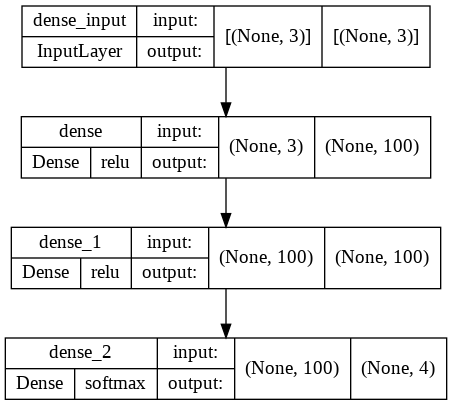

In [ ]:
plot_model(network, to_file='model_plot.png', show_shapes=True, show_layer_names=True,show_layer_activations=True)

In [ ]:
network.predict(np.array([[1,  1 , 1]]))

In [ ]:
network.predict(np.array([[0.5,  1 , 1]]))

array([[0.9649271 , 0.00627558, 0.00629838, 0.02249894]], dtype=float32)

In [ ]:
network.predict(np.array([[0,  1 , 1]]))

array([[0.9783584 , 0.00128774, 0.00402773, 0.01632622]], dtype=float32)

In [ ]:
network.predict(np.array([[0.5,  1 , 1]]))

In [ ]:
network.predict(np.array([[0.5,  1 , 1]]))

In [ ]:
network.save("model.h5")